<a href="https://colab.research.google.com/github/manjum2050/Credit_card_Fraud_Detection/blob/master/Dealing_With_Imbalanced_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

In this notebook, we will employ different predictive models to assess their accuracy in distinguishing between regular payments and fraud. The dataset's features are scaled and feature names are omitted for privacy, but we can still analyze key aspects. Let's begin!

## Objectives:

1. Gain insights into the distribution of the limited data provided.
2. Generate a sub-data frame with an equal 50/50 ratio of "Fraud" and "Non-Fraud" transactions using the NearMiss Algorithm.
3. Identify and assess the performance of the classifiers to determine the one with the highest accuracy.
4. Develop a Neural Network and compare its accuracy with our top-performing classifier.
5. Enhance our understanding of common challenges associated with imbalanced datasets.


## Outline:

I. Gaining Insights into Our Data
  1. Exploring and Understanding Our Data

II. Data Preprocessing
  1. Data Scaling and Distribution
  2. Data Splitting

III. Balancing Data through Random UnderSampling and Oversampling
  1. Data Distribution and Correlation Analysis
  2. Anomaly Detection
  3. Dimensionality Reduction and Clustering (t-SNE)
  4. Leveraging Various Classifiers
  5. In-Depth Analysis of Logistic Regression
  6. Applying Oversampling with SMOTE

IV. Model Evaluation
  1. Model Evaluation using Logistic Regression
  2. Comparative Testing of Neural Networks (Undersampling vs. Oversampling)

## Addressing Previous Imbalanced Dataset Challenges:

* Avoid testing on oversampled or undersampled datasets.
* When implementing cross-validation, oversample or undersample your training data during cross-validation, not beforehand.
* Avoid using accuracy score as a metric for imbalanced datasets; instead, opt for f1-score, precision/recall score, or confusion matrix for more reliable evaluation.









## Gaining Insights into Our Data:

In [260]:
# Imported Libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data processing, CSV file I/O

import tensorflow as tf  # For machine learning and deep learning

import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.manifold import TSNE  # For t-SNE visualization
from sklearn.decomposition import PCA, TruncatedSVD  # For dimensionality reduction techniques
import matplotlib.patches as mpatches  # For creating legends in plots
import time  # For measuring execution time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Other Libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.pipeline import make_pipeline  # For creating pipelines
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline  # For imbalanced data pipelines
from imblearn.over_sampling import SMOTE  # For Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.under_sampling import NearMiss  # For NearMiss under-sampling technique
from imblearn.metrics import classification_report_imbalanced  # For classification reports on imbalanced datasets
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    classification_report,
)  # For various classification metrics
from collections import Counter  # For counting class distributions
from sklearn.model_selection import KFold, StratifiedKFold  # For cross-validation techniques
import warnings  # For suppressing warnings
warnings.filterwarnings("ignore")


In [261]:
df = pd.read_csv("creditcard.csv")

In [262]:
df.head(30)

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   
20  16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
21  17.0  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
22  18.0  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
23  18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
24  22.0 -1.946525 -0.044901 -0.405570 -1.013057  2.941968  2.955053   
25  22.0 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537   
26  23.0  1.173285  0.353498  0.283905  1.133563 -0.172577 -0.916054   
27  23.0  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
28  23.0 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
29  23.0  1.059387 -0.175319  1.266130  1.186110 -0.786002  0.578435   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   
20 -0.878586  0.445290 -0.446196  ... -0.295583 -0.571955 -0.050881 -0

In [263]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

####Check for missing data in the DataFrame

In [264]:
missing_data = df.isnull().sum()

The .isnull() method in Pandas will check for both None and NaN values

In [265]:
missing_data.sum().max()

0

In [266]:
print(missing_data)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [267]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [268]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [269]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

####Check if the dataset has categorical data

In [270]:
categorical_columns = df.select_dtypes(include=["object", "category"])
print("categorical_columns")
print(categorical_columns)

categorical_columns
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[284807 rows x 0 columns]


The above finding shows that, dataset doesn't have categorcial data

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

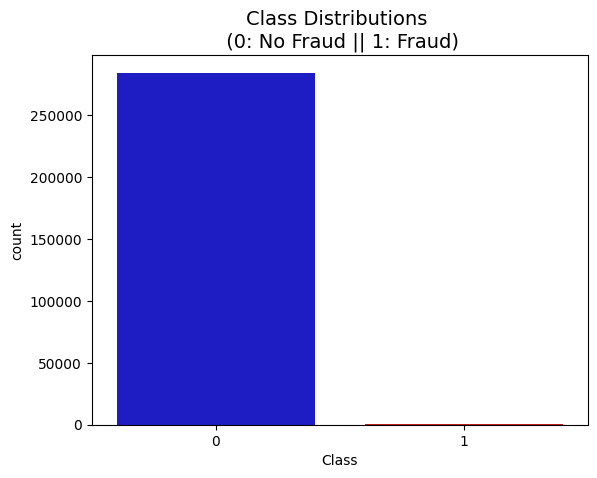

In [271]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Insights:

Our initial step involves gaining a basic understanding of our data. It's important to note that, apart from the 'transaction' and 'amount' columns, we lack information about the other columns due to privacy considerations. However, we do know that the undisclosed columns have already undergone scaling.

### Data Summary:

1. The transaction amounts are relatively small, with an approximate mean of USD 88.
2. We have a dataset free from "Null" values, which eliminates the need for value replacement.
3. The majority of transactions (approximately 99.83%) are non-fraudulent, while fraudulent transactions account for only 0.17% of the dataframe.

### Technical Details of Features:

1. PCA Transformation: The data description indicates that all features have undergone PCA transformation, except for 'time' and 'amount.'
2. Scaling: It's worth noting that PCA transformation requires prior scaling of features. In this case, we assume that all the 'V' features have been scaled as per the dataset developers' approach.


### Note:

Our original dataset is highly imbalanced, with the majority of transactions being non-fraudulent. Using this dataset as-is for our models might lead to errors and overfitting, as the models could incorrectly assume most transactions are not fraud. However, our objective is not to have our model make assumptions; instead, we aim for our model to identify patterns that indicate signs of fraud.

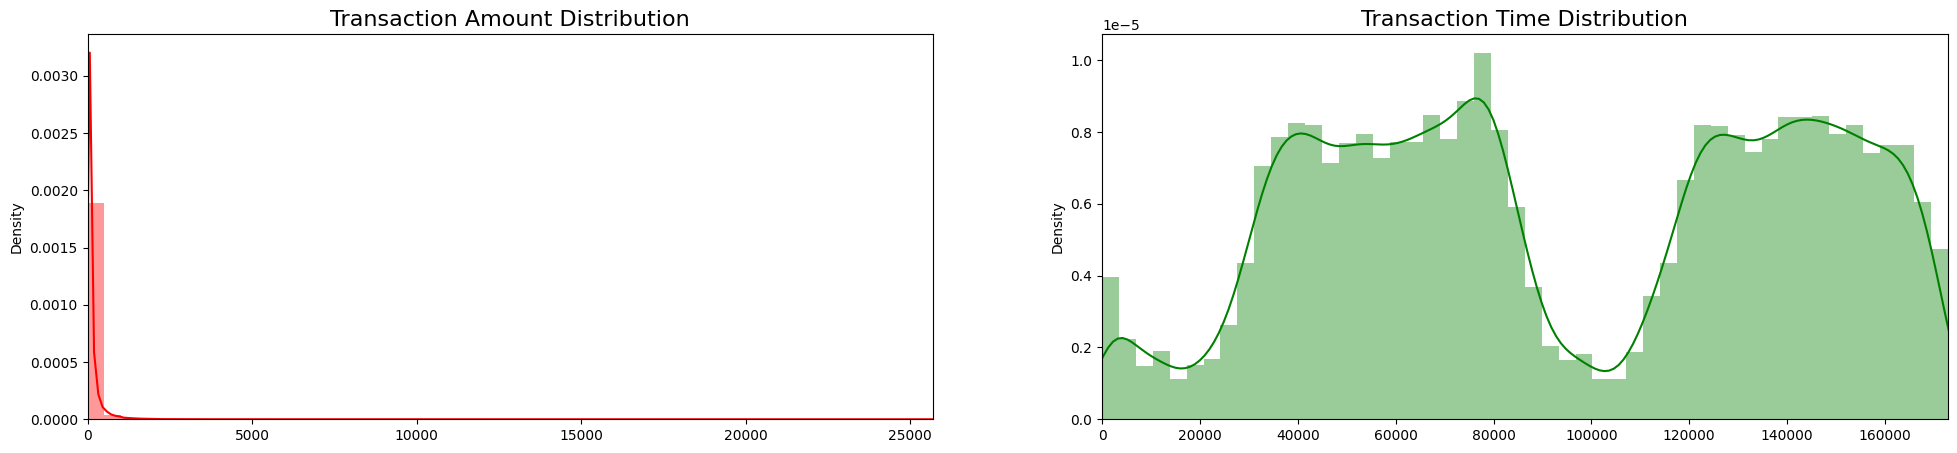

In [272]:
fig, ax = plt.subplots(1, 2, figsize=(24,5))

amount_values = df['Amount'].values
time_values = df['Time'].values

sns.distplot(amount_values, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount Distribution', fontsize=16)
ax[0].set_xlim([min(amount_values), max(amount_values)])

sns.distplot(time_values, ax=ax[1], color='g')
ax[1].set_title('Transaction Time Distribution', fontsize=16)
ax[1].set_xlim([min(time_values), max(time_values)])



plt.show()

### Distributions:

Examining these distributions provides insight into the skewness of the features. Additionally, we can explore the distributions of other features. In this notebook, we will consider techniques to reduce skewness in the distributions in the future.

Skewness: A distortion or asymmetry that deviates from the symmetrical bell
curve or a normal distribution, in a set of data.

### Data Scaling and Distribution:
We need to scale the columns - Time and Amount so as to have the same scale as other columns. Scaling is important in many machine learning algorithms to ensure that features with different scales do not unduly influence the model.

We need to create sub sample of dataframe in order to have equal amount of Fraud and Non-Fraud cases. This step is critical to address the data imbalance issue and prevent overfitting. A balanced dataset ensures that the model can better understand the patterns of both fraudulent and non-fraudulent transactions, leading to more accurate results.

#### Subsample:
We will create a dataframe having 50/50 ratio of fraud and non-fraud transactions.

#### We need sub-sampling technique because:

1. Overfitting: Due to highly imbalaced data, our model would learn more patterns about non-fraud transactions during training phase and may perform poorly on unseen or test data. We need avoid this as we want our model is to be certain when a fraud occurs.
2. Wrong Correlations: With a highky imbalanced dataset, We can't see the true correlations between the class and the features.

In [273]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Summary:
1. scaled_amount and scaled_time Will be the new columns after scaling amount and time
2. There are 492 cases of fraud in our dataset. We can randomly get 492 non-fraud datapoints to create a sub-sample.

In [274]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [275]:
#re-arranging the columns so as to place  scaled_amount at 0 and scaled_time at 1 indices.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(["scaled_amount", "scaled_time"], axis=1, inplace=True)
df.insert(0, "scaled_amount", scaled_amount)
df.insert(1, "scaled_time", scaled_time)

In [276]:
df.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]

### Splitting the data
We need to split the orginal data because the main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [277]:
from sklearn.model_selection import train_test_split, StratifiedKFold

print('No Frauds', round(df["Class"].value_counts()[0]/len(df) * 100,2), '%of the dataset')
print('Frauds', round(df["Class"].value_counts()[1]/len(df) * 100,2), '%of the dataset')

#split into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Using StratifiedKFold to split the data
#default values n_splits=5, *, shuffle=False, random_state=None

s_fold = StratifiedKFold()

for train_index, test_index in s_fold.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  original_Xtrain,  original_Xtest = X[train_index], X[test_index]
  original_ytrain, original_ytest = y[train_index], y[test_index]

# X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

# original_Xtrain,  original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size = 0.2, random_state= 1)


No Frauds 99.83 %of the dataset
Frauds 0.17 %of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [278]:
print(len(original_Xtrain), len(original_Xtest), len(original_ytrain), len(original_ytest))

227846 56961 227846 56961


#### Checking the similarity of Label Distributions in Both Training and Test Sets

In [279]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

In [280]:
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


 #### Summary:
 1. It indicates that approximately 99.83% of the samples in the training dataset belong to class 0, while around 0.17% belong to class 1.
 2. It shows similar proportions, with about 99.83% of the test samples belonging to class 0 and approximately 0.17% belonging to class 1.

### Random Under-sampling:
Its a technique involving the removal of data to create a more balanced dataset. This step is aimed at preventing overfitting in our models.

Create a dataframe with 50/50 ratio of fradualant, non-fradualant transactions
Since we have 492 cases of fraud, we will pick 492 cases of non-fraud transactions to create a dataframe.

##### Note:
There is a great chance of information loss as we are picking 492 cases of non-fraud transactions from 2,84,315 non-fraud transaction.

In [281]:
#shuffle the data before creating the subsamples
df = df.sample(frac=1)

#create fraud and and non_fraud df's
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

#concat the df's
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#shuffle the df
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
45228        2.267589    -0.498537 -0.563529  0.574480  0.060544  0.053372   
235644       1.406833     0.749386 -1.541678  3.846800 -7.604114  3.121459   
267562       1.050374     0.917938  1.921395 -0.082911 -2.379767  0.168953   
80760        1.284427    -0.306042 -0.451383  2.225147 -4.953050  4.342228   
255556      -0.296653     0.852830 -0.242245  4.147186 -5.672349  6.493741   

              V5        V6        V7        V8  ...       V20       V21  \
45228  -0.398754 -0.310239  0.970076  0.243877  ...  0.209604  0.190175   
235644 -1.254924 -2.084875 -2.385027  1.471140  ...  0.114760  1.096405   
267562  0.938758 -0.286195  0.329561 -0.220330  ...  0.104636  0.225928   
80760  -3.656190 -0.020121 -5.407554 -0.748436  ...  0.724381 -0.575924   
255556  1.591168 -1.602523 -0.950463  0.722903  ...  0.562030  0.249023   

             V22       V23       V24       V25       V26       V27       V28  \
45228   0.112131  0.283064 -0.452949 -0.067487  0.338251 -0.177073 -0.027213   
235644  1.064222  0.065370  0.257209 -0.693654 -0.335702  0.577052  0.398348   
267562  0.645900 -0.293299 -1.484299  0.393328 -0.043904 -0.014346 -0.034948   
80760   0.495889  1.154128 -0.016186 -2.079928 -0.554377  0.455179  0.001321   
255556 -0.480286 -0.286080 -1.153575 -0.035571  0.559628  0.409446  0.221048   

        Class  
45228       0  
235644      1  
267562      0  
80760       1  
255556      1  

[5 rows x 31 columns]

#### Equally Distributing and Correlating:

Let's check the relationships between features and the target variable

Distribution of the classes in the new_df
0    0.5
1    0.5
Name: Class, dtype: float64


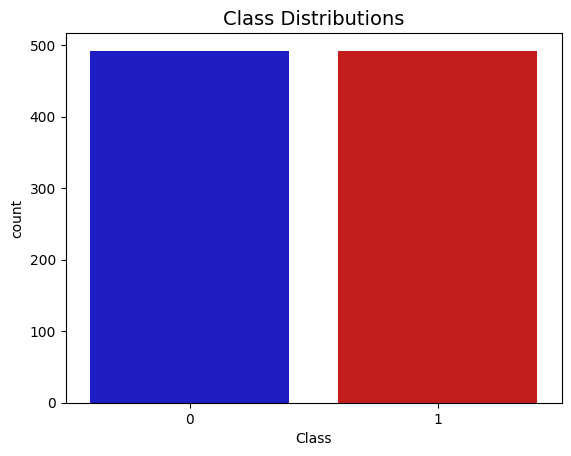

In [282]:
print("Distribution of the classes in the new_df")
print(new_df["Class"].value_counts()/len(new_df))

sns.countplot(x="Class", data=new_df, palette=colors)
plt.title('Class Distributions', fontsize =14)
plt.show()

#### Correlation Matrices

1. checking with dataprep package from SFU


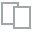
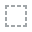
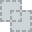
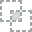
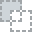
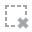
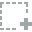
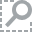
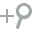
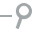
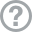
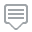
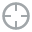
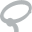
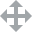
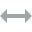
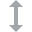
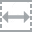
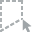
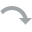
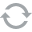
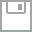
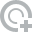
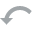
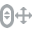
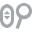
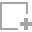
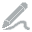
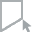
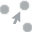
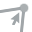
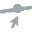

In [283]:
from dataprep.eda import plot_correlation
plot_correlation(new_df)

In [284]:
import plotly.express as px

In [285]:
# # Make sure we use the new dataframe for checking the co-relation
# f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# # checking correlation for the original imbalanced data
# corr = df.corr()
# sns.heatmap(corr, cmap="Blues", annot_kws={"size":20}, ax=ax1)
# ax1.set_title("Don't use(Just for reference) Imbalanced original dataset correlation")


# # checking correlation for the new data (balanced)
# sub_data_corr = new_df.corr()
# sns.heatmap(sub_data_corr, cmap="Blues", annot_kws={"size":20}, ax=ax2)
# ax2.set_title("Balanced new dataset correlation")

# plt.subplots_adjust(hspace=0.5)
# plt.show()



import plotly.graph_objects as go

# checking correlation for the original imbalanced data
corr = df.corr()

# checking correlation for the new data (balanced)
sub_data_corr = new_df.corr()

# Plotly heatmaps
fig1 = go.Figure(data=go.Heatmap(z=corr.values, x=corr.columns, y=corr.index, colorscale='Blues', hoverongaps=False))

# Customize the hover information and set the title and figure size
fig1.update_traces(hovertemplate='Column %{y}<br>Row %{x}<br>Value: %{z:.2f}')
fig1.update_layout(title_text="Imbalanced Dataset Correlation", width=1080, height=760)

fig2 = go.Figure(data=go.Heatmap(z=sub_data_corr.values, x=sub_data_corr.columns, y=sub_data_corr.index, colorscale='Blues', hoverongaps=False))

# Customize the hover information and set the title and figure size
fig2.update_traces(hovertemplate='Column %{y}<br>Row %{x}<br>Value: %{z:.2f}')
fig2.update_layout(title_text="Balanced Dataset Correlation", width=1080, height=760)

# Show the interactive Plotly heatmaps
fig1.show()
fig2.show()


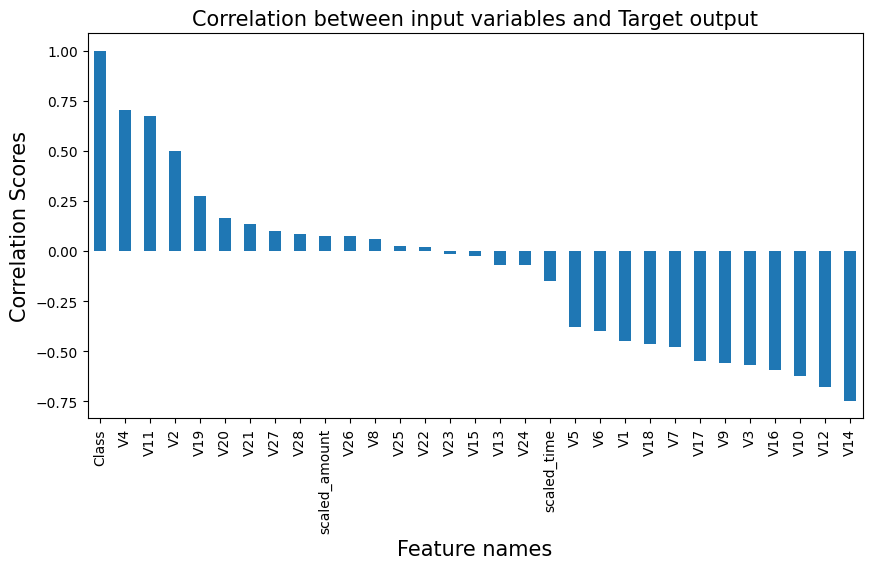

In [286]:
#Plotting the Bar Plot to show the correlations between input variables and target output 'Class'
plt.figure(figsize=(10,5))
ax = sub_data_corr['Class'].sort_values(ascending = False)
ax.plot(kind='bar')
plt.title('Correlation between input variables and Target output', fontsize=15)
plt.xlabel("Feature names", fontsize=15)
plt.ylabel("Correlation Scores", fontsize=15)
plt.xticks(rotation=90);

#### Observations:

Negative correlation:

##### Note: hower on the cells to see the data. Also, 1 --> fraud 0 --> Non-Fraud

*   Positive Correlations with Class: V4, V11, V2, V19 are positively correlated.
*   Negative Correlations with Class: V17, V9, V3, V16, V10, V12, V14 are negatively correlated.



#### Anomoly Detection:

We have to remove the "extreme outliers" from the features that have a high corelation with the "Class". This would help improving the accuracy of our models.

#### IQR (Interquartile Range):
Detects anomalies by comparing data points to the interquartile range. Data points outside the IQR are considered anomalies.

##### Let's see the box plots for Positive Correlations and Negative Correlations with dependent variable "Class"

Hower over to see the data.

In [287]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the color palette
colors = ["#0101DF", "#DF0101"]

# Create subplots with a 2x2 grid and a maximum of 4 items per row
# V4, V11, V2, V19
fig = make_subplots(rows=2, cols=2, subplot_titles=[
    "V4 vs Class Positive Correlation", "V11 vs Class Positive Correlation",
    "V2 vs Class Positive Correlation", "V19 vs Class Positive Correlation"
])

# Define the data
box_data = [new_df[new_df['Class'].isin([0, 1])] for _ in range(4)]
feature_names = ["V4", "V11", "V2", "V19"]

row, col = 1, 1  # Initialize row and column for subplot placement

for i, feature in enumerate(feature_names):
    for class_value, color in zip([0, 1], colors):
        data = box_data[i][box_data[i]['Class'] == class_value]
        trace = go.Box(x=data['Class'], y=data[feature], name=f'Class={class_value}', marker_color=color)
        fig.add_trace(trace, row=row, col=col)

    if col < 2:
        col += 1
    else:
        col = 1
        row += 1

# Update layout and show the subplots
fig.update_layout(showlegend=False, width=700, height=800)
fig.show()

In [288]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the color palette
colors = ["#0101DF", "#DF0101"]

# Create subplots with a 2x2 grid and a maximum of 4 items per row
# V17, V9, V3, V16, V10, V12, V14
fig = make_subplots(rows=4, cols=2, subplot_titles=[
    "V17 vs Class Positive Correlation", "V9 vs Class Positive Correlation",
    "V3 vs Class Positive Correlation", "V16 vs Class Positive Correlation",
    "V10 vs Class Positive Correlation", "V12 vs Class Positive Correlation",
    "V14 vs Class Positive Correlation"
])

# Define the data
box_data = [new_df[new_df['Class'].isin([0, 1])] for _ in range(7)]
feature_names = ["V17", "V9", "V3", "V16", "V10", "V12", "V14"]

row, col = 1, 1  # Initialize row and column for subplot placement

for i, feature in enumerate(feature_names):
    for class_value, color in zip([0, 1], colors):
        data = box_data[i][box_data[i]['Class'] == class_value]
        trace = go.Box(x=data['Class'], y=data[feature], name=f'Class={class_value}', marker_color=color)
        fig.add_trace(trace, row=row, col=col)

    if col < 2:
        col += 1
    else:
        col = 1
        row += 1

# Update layout and show the subplots
fig.update_layout(showlegend=False, width=1080, height=1400)
fig.show()

### Outlier Removal Tradeoff:

We will check for lower and upper extreme threshold for finding "extreme outliers". Ex, lower extreme threshold = q25 - threshold and upper extreme threshold = q75 + threshold
We will start with higher number for ex threshold = 3 as higher this threshold is, the less outliers will detect and thereby avoiding data loss(which might cause underfitting)

*   BoxPlots: From Boxplots we can easily see extreme outliers besides easily seeing the 25th and 75th percentiles. However on the boxplots to see the exact data.







#### Visualize Distributions(Gaussian distribution):


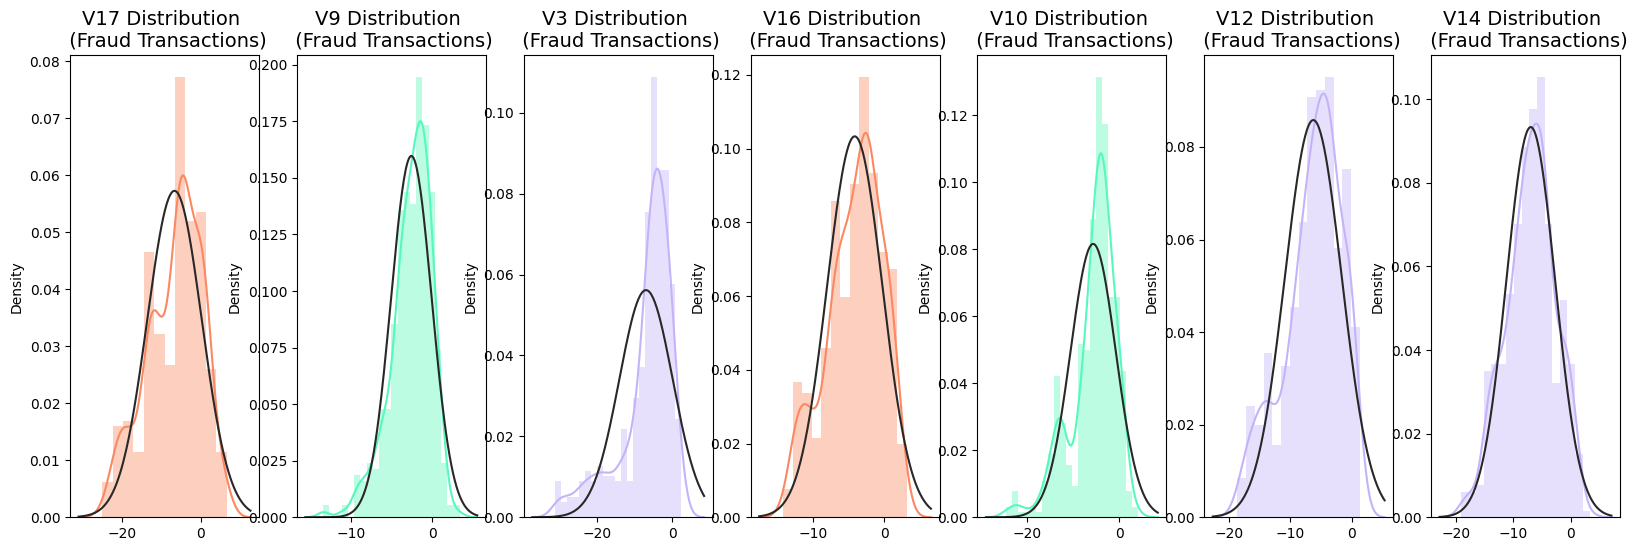

In [289]:
from scipy.stats import norm

#Positive correlation
#V17, V9, V3, V16, V10, V12, V14

#Negative correlation
## V4, V11, V2, V19

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7, figsize=(20, 6))

v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

v9_fraud_dist = new_df['V9'].loc[new_df['Class'] == 1].values
sns.distplot(v9_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V9 Distribution \n (Fraud Transactions)', fontsize=14)


v3_fraud_dist = new_df['V3'].loc[new_df['Class'] == 1].values
sns.distplot(v3_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V3 Distribution \n (Fraud Transactions)', fontsize=14)

v16_fraud_dist = new_df['V16'].loc[new_df['Class'] == 1].values
sns.distplot(v16_fraud_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('V16 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax5, fit=norm, color='#56F9BB')
ax5.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)


v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax6, fit=norm, color='#C5B3F9')
ax6.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax7, fit=norm, color='#C5B3F9')
ax7.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

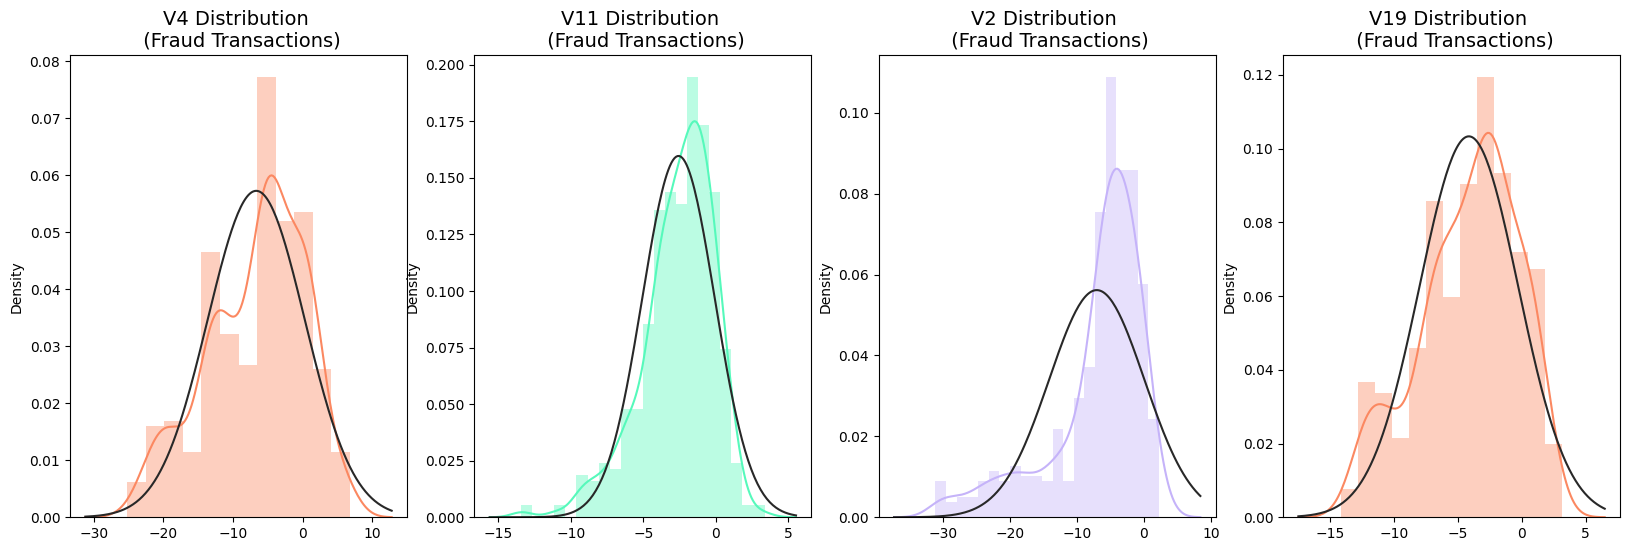

In [290]:
#Negative correlation
## V4, V11, V2, V19

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
sns.distplot(v9_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)


v2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
sns.distplot(v3_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

v19_fraud_dist = new_df['V19'].loc[new_df['Class'] == 1].values
sns.distplot(v16_fraud_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

#### Summary:
By looking at all these plots, V14 is the only feature that has a Gaussian distribution.

#### Removing extreme outliers:

In [291]:

#Positive correlation
#V17, V9, V3, V16, V10, V12, V14

#Negative correlation
# V4, V11, V2, V19

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 40)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V16 Feature
v16_fraud = new_df['V16'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
v16_iqr = q75 - q25

v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('V16 Lower: {}'.format(v16_lower))
print('V16 Upper: {}'.format(v16_upper))
outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('V16 outliers: {}'.format(outliers))
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V16'] > v16_upper) | (new_df['V16'] < v16_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

print('----' * 44)

# Removing outliers V3 Feature
v3_fraud = new_df['V3'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v3_fraud, 25), np.percentile(v3_fraud, 75)
v3_iqr = q75 - q25

v3_cut_off = v3_iqr * 1.5
v3_lower, v3_upper = q25 - v3_cut_off, q75 + v3_cut_off
print('V3 Lower: {}'.format(v3_lower))
print('V3 Upper: {}'.format(v3_upper))
outliers = [x for x in v3_fraud if x < v3_lower or x > v3_upper]
print('V3 outliers: {}'.format(outliers))
print('Feature V3 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V3'] > v3_upper) | (new_df['V3'] < v3_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

print('----' * 44)

# Removing outliers V9 Feature
v9_fraud = new_df['V9'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v9_fraud, 25), np.percentile(v9_fraud, 75)
v9_iqr = q75 - q25

v9_cut_off = v9_iqr * 1.5
v9_lower, v9_upper = q25 - v9_cut_off, q75 + v9_cut_off
print('V16 Lower: {}'.format(v9_lower))
print('V16 Upper: {}'.format(v9_upper))
outliers = [x for x in v9_fraud if x < v9_lower or x > v9_upper]
print('V9 outliers: {}'.format(outliers))
print('Feature V9 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V9'] > v9_upper) | (new_df['V9'] < v9_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

# Removing outliers V17 Feature
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
v17_iqr = q75 - q25

print('----' * 44)

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('V17 Lower: {}'.format(v17_lower))
print('V17 Upper: {}'.format(v17_upper))
outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('V17 outliers: {}'.format(outliers))
print('Feature V17 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V17'] > v17_upper) | (new_df['V17'] < v17_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.0475965708216, -18.6837146333443, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.2556117491401, -22.1870885620007, -16.601

#### Boxplots for the features after removing the extreme outliers:

In [292]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the color palette
colors = ["#0101DF", "#DF0101"]

# Create subplots with a 2x2 grid and a maximum of 4 items per row
# V17, V9, V3, V16, V10, V12, V14
fig = make_subplots(rows=4, cols=2, subplot_titles=[
    "V17 vs Class Positive Correlation", "V9 vs Class Positive Correlation",
    "V3 vs Class Positive Correlation", "V16 vs Class Positive Correlation",
    "V10 vs Class Positive Correlation", "V12 vs Class Positive Correlation",
    "V14 vs Class Positive Correlation"
])

# Define the data
box_data = [new_df[new_df['Class'].isin([0, 1])] for _ in range(7)]
feature_names = ["V17", "V9", "V3", "V16", "V10", "V12", "V14"]

row, col = 1, 1  # Initialize row and column for subplot placement

for i, feature in enumerate(feature_names):
    for class_value, color in zip([0, 1], colors):
        data = box_data[i][box_data[i]['Class'] == class_value]
        trace = go.Box(x=data['Class'], y=data[feature], name=f'Class={class_value}', marker_color=color)
        fig.add_trace(trace, row=row, col=col)

    if col < 2:
        col += 1
    else:
        col = 1
        row += 1

# Update layout and show the subplots
fig.update_layout(showlegend=False, width=1080, height=1400)
fig.show()

#### Dimensionality Reduction and Clustering:

Dimensionality Reduction: Its is the process of reducing the number of input variables (or features) in a dataset while preserving as much useful information as possible. It aims to eliminate irrelevant, redundant, or noisy features to simplify the dataset and improve computational efficiency

Methods:
1. Principal Component Analysis (PCA): Linear technique that transforms data into a new coordinate system to maximize variance.

2. t-Distributed Stochastic Neighbor Embedding (t-SNE): Non-linear technique for visualization.
3. Autoencoders: Neural network-based approach to learn compact representations.


In [293]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 9.0 s
PCA took 0.0075 s
Truncated SVD took 0.0083 s


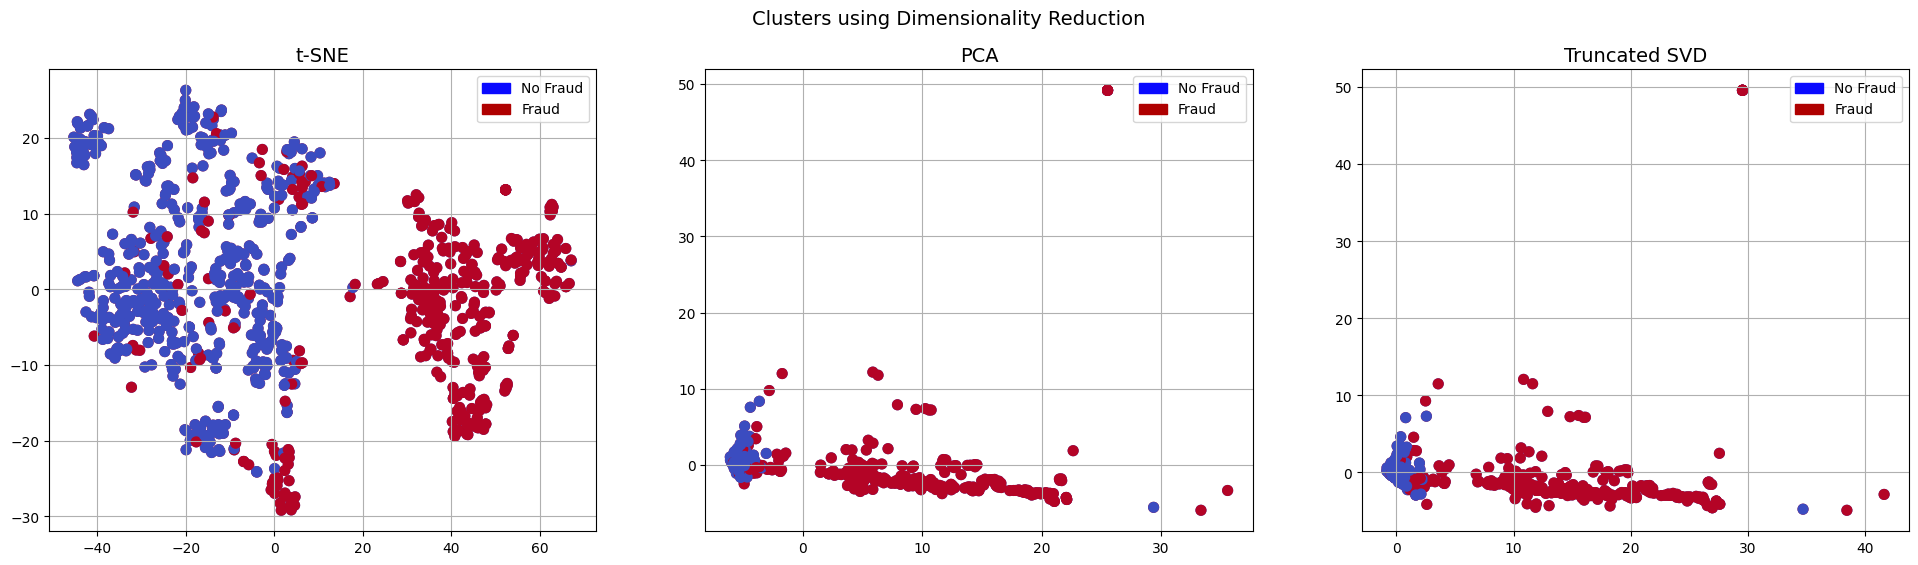

In [294]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

#### Summary:
t-SNE algorithm performed well in clustering datapoints into fradulent and non-fradulent.

While the subsample remains relatively small, t-SNE demonstrates remarkable cluster detection accuracy across all scenarios, even when the dataset is shuffled before applying t-SNE.

This suggests that subsequent predictive models are likely to effectively distinguish between fraud and non-fraud cases.

### Build Models:
We use undersampling technique to train the models.

Undersampling is a technique used in machine learning to address class imbalance in a dataset, especially when one class significantly outnumbers the other. In the context of class imbalance, undersampling involves reducing the number of instances in the majority class to balance it with the minority class. This can help prevent machine learning models from being biased towards the majority class and improve their ability to predict the minority class accurately.

### Undersampling and oversampling:

Undersampling and oversampling are techniques used in the field of imbalanced class classification problems to address the issue of class imbalance. In such problems, one class of data significantly outnumbers the other class, making it challenging for machine learning algorithms to learn and predict the minority class effectively.


**Undersampling:**

1. Undersampling is a technique used to balance class distribution by reducing the number of examples from the majority class.

2. It involves randomly removing some of the examples from the majority class until the class distribution becomes more balanced.

3. While it can help in balancing the dataset, it may also lead to loss of information if important data points are removed.


**Oversampling:**

1. Oversampling is a technique used to balance class distribution by increasing the number of examples in the minority class.

2. It involves generating synthetic examples for the minority class to make it similar in size to the majority class.

3. Common methods for oversampling include Synthetic Minority Over-sampling Technique (SMOTE) and Adaptive Synthetic Sampling (ADASYN).


The choice between oversampling and undersampling depends on the specific problem, dataset, and the machine learning algorithm being used. Sometimes, a combination of both techniques, known as a combination sampling method, can also be employed to balance the dataset effectively.

It's important to note that oversampling may lead to overfitting, especially when applied excessively, so it's crucial to assess the impact of these techniques on the model's performance through cross-validation and testing.

####Diving the data set into X and y

In [295]:
# deviding the data()

X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

In [296]:
# split the data for training and testing(undersampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Classifiers:
1. Logisitic Regression
2. KNN
3. SVM
4. Decision Tree

### Training:

In [297]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [298]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


#### Using GridSearchCV to find the best parmas(we do this during training):

In [299]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [300]:
# Cross Validation to check Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.57%
Knears Neighbors Cross Validation Score 92.86%
Support Vector Classifier Cross Validation Score 93.29%
DecisionTree Classifier Cross Validation Score 91.86%


### Summary:
cv=5: This parameter specifies the number of folds in a k-fold cross-validation. In our case, cv=5 means that the training data will be divided into 5 equal parts or folds. The cross-validation process will train and evaluate the model 5 times, each time using a different one of these folds as the validation set while the remaining 4 folds are used for training.

#### Logistic Regression:

* After GridSearchCV with cv=5: Cross Validation Score of 94.0%

* Before GridSearchCV: Training score of 94.0%

In this case, the cross-validation score and training score are the same (94.0%). This suggests that the model's performance is consistent across different folds in cross-validation. It indicates that the model generalizes well and is likely not overfitting, as both the cross-validation score and the training score are similar.

#### K-nearest Neighbors (KNN):

* After GridSearchCV with cv=5: Cross Validation Score of 94.43%

* Before GridSearchCV: Training score of 94.0%

After applying GridSearchCV, the cross-validation score improved to 94.43%. This is generally a good sign because it indicates that the hyperparameter tuning led to improved generalization, which is the purpose of cross-validation.

#### Support Vector Classifier (SVC):

* After GridSearchCV with cv=5: Cross Validation Score of 94.0%

* Before GridSearchCV: Training score of 94.0%

Similar to logistic regression, the cross-validation score and training score are the same (94.0%) after GridSearchCV. This implies that the model generalizes well, and hyperparameter tuning did not significantly change its performance.

#### Decision Tree Classifier:

* After GridSearchCV with cv=5: Cross Validation Score of 93.86%

* Before GridSearchCV: Training score of 91.0%

Before hyperparameter tuning, the training score was 91.0%. However, after applying GridSearchCV, the cross-validation score increased to 93.86%. This indicates that hyperparameter tuning improved the generalization of the decision tree model. It's essential to use cross-validation as it provides a more reliable estimate of how the model will perform on unseen data.

----------------------------------------------------------------------------
#### Overall, applying GridSearchCV for hyperparameter tuning and using cross-validation helps to improve the models' generalization to unseen data. It's a good practice to use these techniques to ensure your models are robust and not overfitting the training data. The fact that cross-validation scores are consistent and sometimes even better than training scores is a positive sign of good model performance.
----------------------------------------------------------------------------








In [301]:
# We will undersample during cross validating
undersample_X = df.iloc[:, :-1].values
undersample_y = df.iloc[:, -1].values

for train_index, test_index in s_fold.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X[train_index], undersample_X[test_index]
    undersample_ytrain, undersample_ytest = undersample_y[train_index], undersample_y[test_index]

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)

# Create an instance of the NearMiss class with the desired parameters
nm = NearMiss(sampling_strategy='auto', version=1, n_neighbors=3, n_neighbors_ver3=3, n_jobs=None)

# Use the instance to perform undersampling on your data
X_nearmiss, y_nearmiss = nm.fit_resample(undersample_X, undersample_y)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


# Cross Validating the right way

for train, test in s_fold.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56956  56957  56958 ... 284804 284805 284806] Test: [    0     1     2 ... 59373 59429 59510]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56956  56957  56958 ... 116933 116981 117223]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113915 113916 113917 ... 170882 170883 171629]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170884 170885 170886 ... 230046 230424 231522]
Train: [     0      1      2 ... 230046 230424 231522] Test: [227839 227840 227841 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


### Let's Plot Learning Curves

In [302]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator - Logistic Regression
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator - K- nearest Neighbors
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K- nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator - Support Vector Machine
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Machine \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator - Decision Tree
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

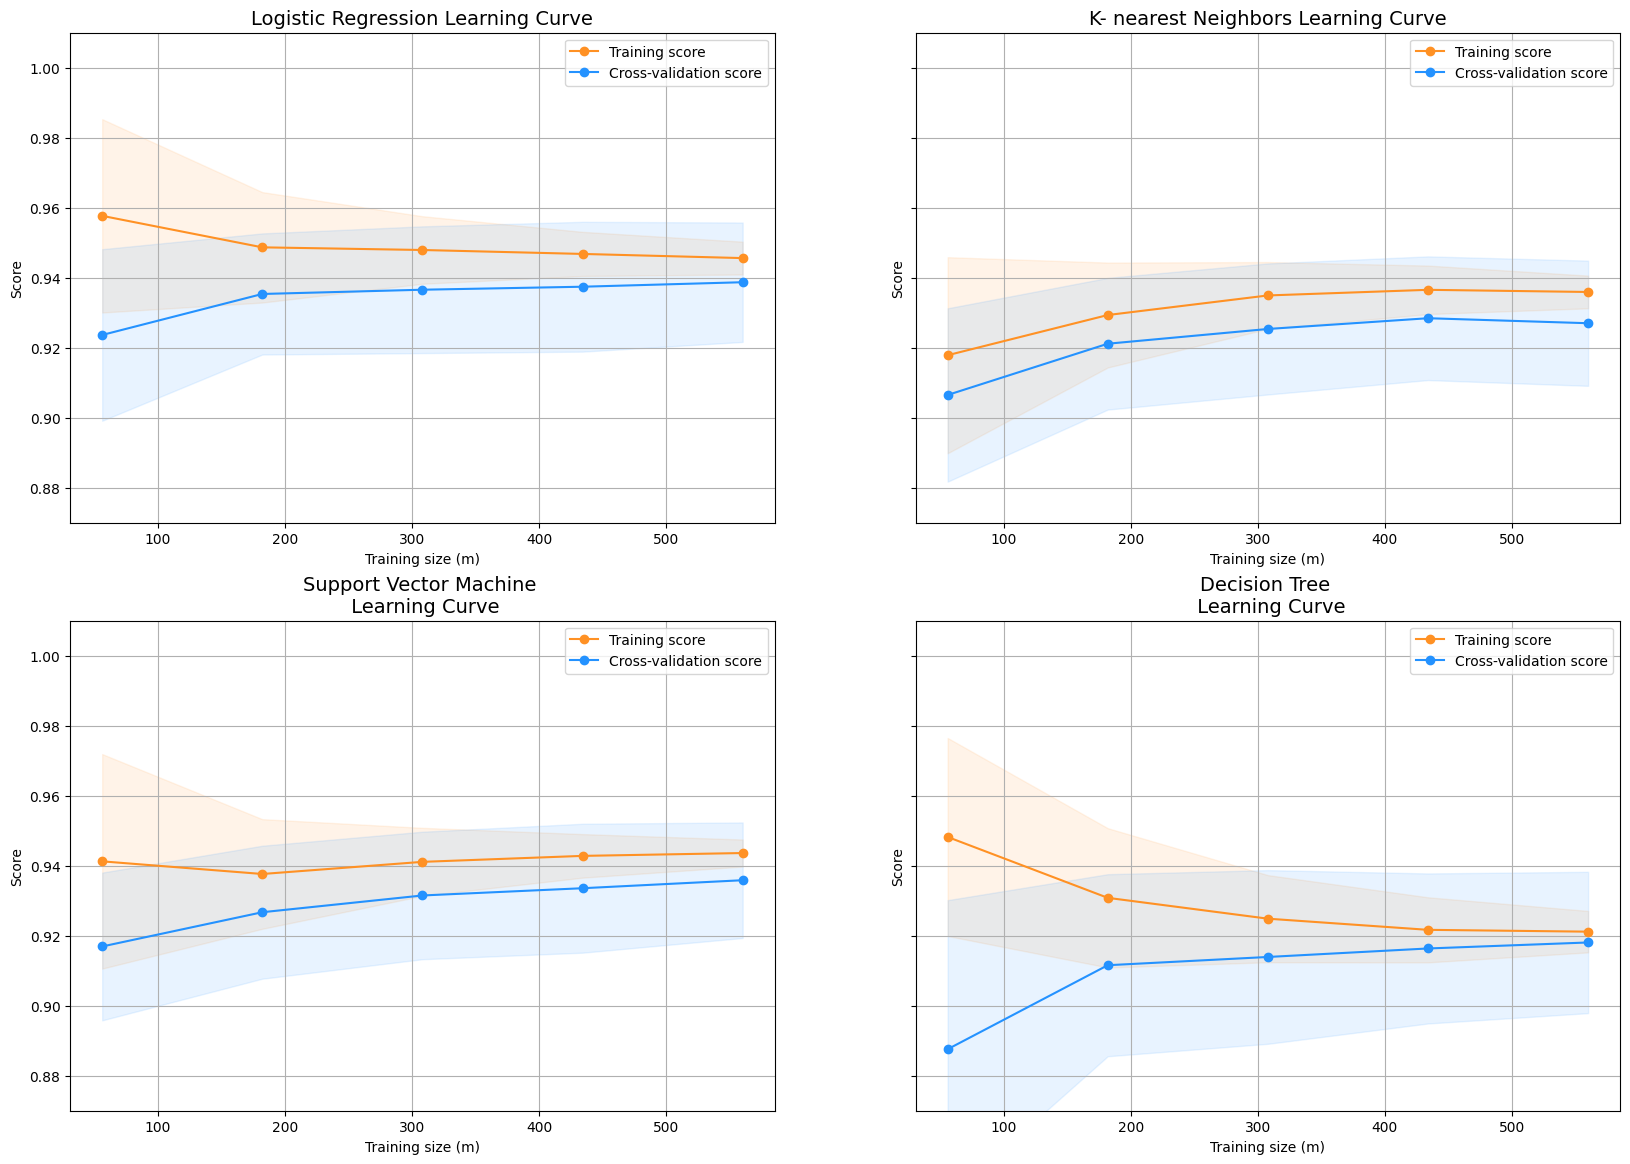

In [303]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

### Summary:
1. The **wider the gap** between the training score and the cross validation score, the more likely your model is **overfitting (high variance)**.
2. If the score is **low** in both **training** and **cross-validation** sets this is an indication that our model is **underfitting (high bias)**.
3. **KNN Classifier** shows the best score after hyperparameter tuning. Also, it has good accuracy on training data.

In [304]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [305]:
# from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9740437609319824
KNears Neighbors:  0.9227583248077622
Support Vector Classifier:  0.9804049371307877
Decision Tree Classifier:  0.9116118279924754


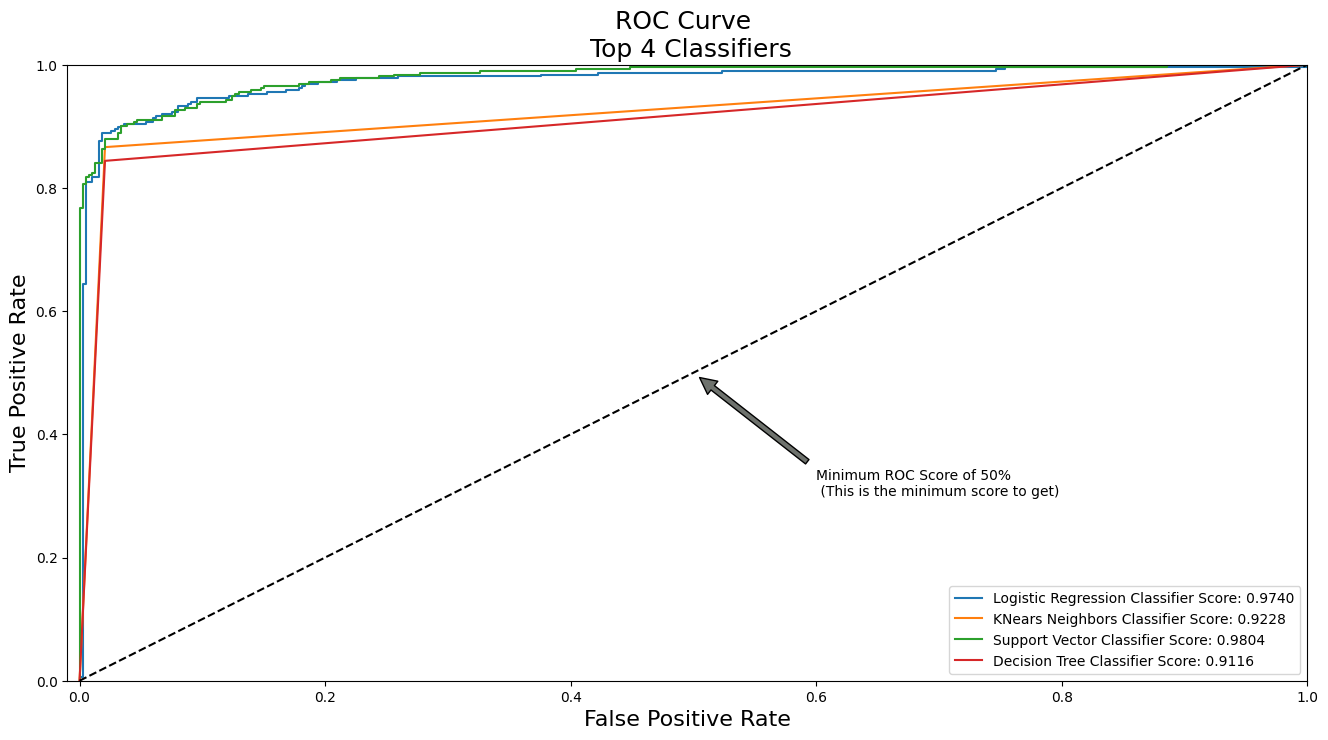

In [306]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## **Receiver Operating Characteristic (ROC)**:

The ROC curve is a graphical representation used to evaluate the performance of binary classification models. It illustrates the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) for different thresholds used to make predictions. Here's a breakdown of the key components of an ROC curve:


**True Positive Rate (TPR)**:

* Also known as Sensitivity or Recall.
* TPR is the ratio of correctly predicted positive instances (true positives) to the total number of actual positive instances. It measures the model's ability to correctly identify positive cases.
* TPR = True Positives / (True Positives + False Negatives)

**False Positive Rate (FPR)**:

* FPR is the ratio of incorrectly predicted negative instances (false positives) to the total number of actual negative instances. It measures the model's ability to correctly identify negative cases.
* FPR = False Positives / (False Positives + True Negatives)

**Thresholds**:

* Classification models produce probability scores or decision thresholds for classifying instances as positive or negative.
* ROC curves are created by varying these thresholds to calculate TPR and FPR at each point.

*The ROC curve is a plot of TPR (y-axis) against FPR (x-axis) for various threshold values. A better classifier will have an ROC curve that hugs the top-left corner of the plot, indicating high TPR and low FPR across different threshold settings. The diagonal line from the bottom-left to the top-right represents random guessing, and any classifier below this line is considered less effective than random guessing.*

*Additionally, the area under the ROC curve (AUC-ROC) is a common metric used to summarize the overall performance of a classification model. A higher AUC-ROC score indicates better model performance.*


### Terms:

* **True Positives**: Correctly Classified Fraud Transactions
* **False Positives**: Incorrectly Classified Fraud Transactions
* **True Negative**: Correctly Classified Non-Fraud Transactions
* **False Negative**: Incorrectly Classified Non-Fraud Transactions
* **Precision**: True Positives/(True Positives + False Positives)
* **Recall**: True Positives/(True Positives + False Negatives)

1. **Precision** as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.


2. **Precision/Recall Tradeoff**: The more precise (selective) our model is, the less cases it will detect.

Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

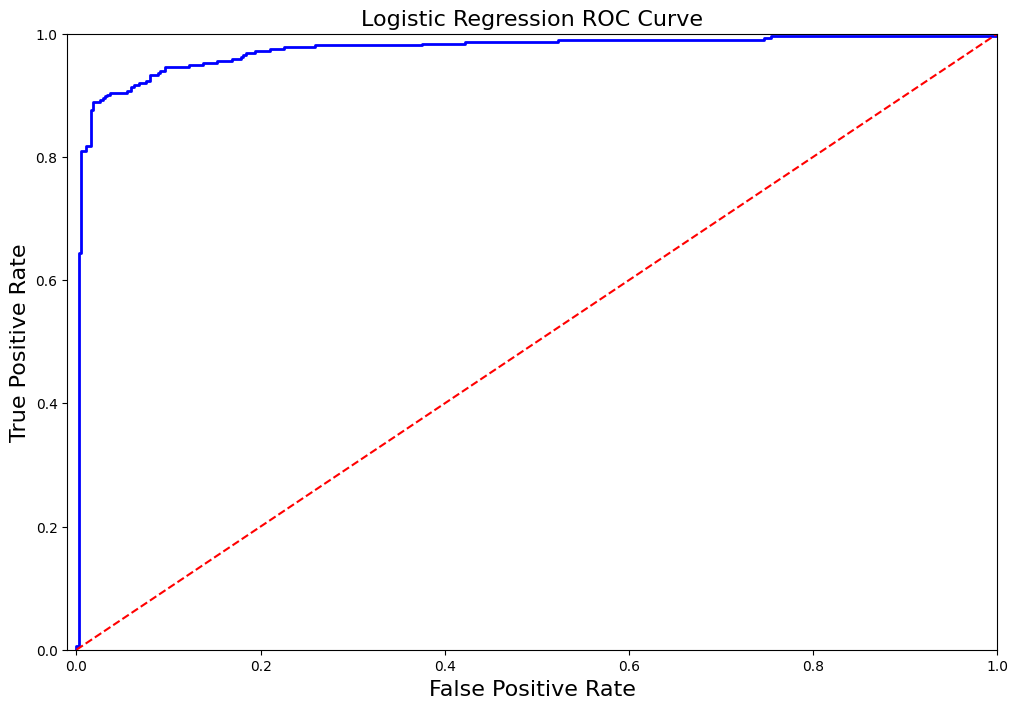

In [307]:
# def knears_neighbors_roc_curve(knear_fpr, knear_tpr):
#     plt.figure(figsize=(12,8))
#     plt.title('Logistic Regression ROC Curve', fontsize=16)
#     plt.plot(knear_tpr, knear_tpr, 'b-', linewidth=2)
#     plt.plot([0, 1], [0, 1], 'r--')
#     plt.xlabel('False Positive Rate', fontsize=16)
#     plt.ylabel('True Positive Rate', fontsize=16)
#     plt.axis([-0.01,1,0,1])


# knears_neighbors_roc_curve(knear_tpr, knear_tpr)
# plt.show()

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()


In [308]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [309]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.72
F1 Score: 0.81
Accuracy Score: 0.80
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.65
Precision Score: 0.00
Recall Score: 0.29
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [310]:
from sklearn.metrics import average_precision_score

undersample_y_score = log_reg.decision_function(original_Xtest)

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.06


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.06')

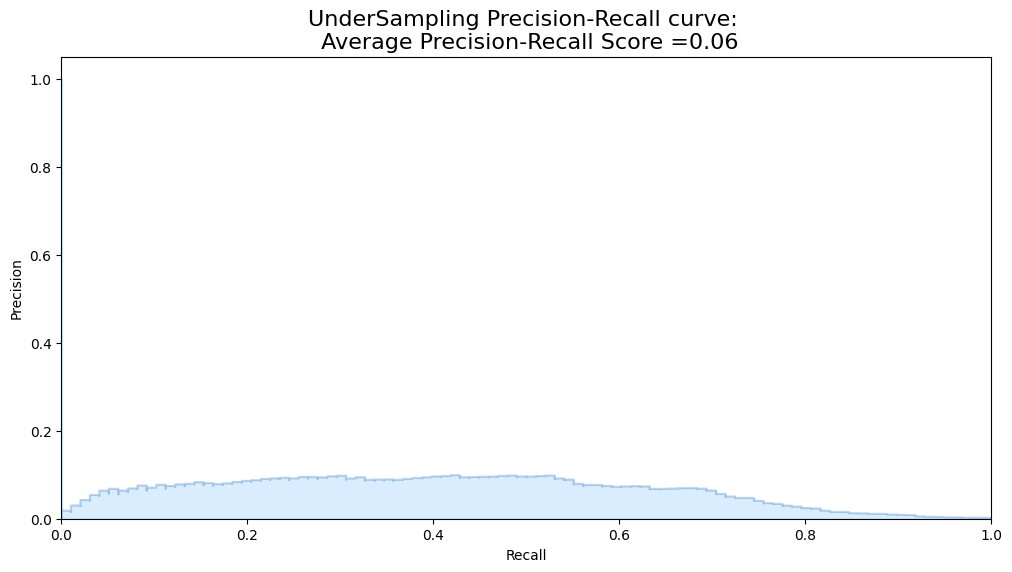

In [311]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

SMOTE Technique:

SMOTE - Synthetic Minority Over-sampling Technique

This is another alternative for solving the "class imbalance problems".

SMOTE helps to address class imbalance by creating new synthetic examples for the minority class, making it more balanced with the majority class. By doing so, it can improve the performance of machine learning models, as they have more examples to learn from the minority class.

Here's how SMOTE works:

1. Select a minority class instance as the starting point (e.g., a point in a feature space).

2. Find its k nearest neighbors among the minority class instances. Typically, the Euclidean distance is used to measure proximity.

3. Randomly choose one of the k nearest neighbors.

4. Generate a synthetic instance by interpolating between the selected instance and the chosen neighbor. This interpolation is done by picking random values along the lines connecting the two instances in the feature space.

5. Repeat steps 1 to 4 until the desired balance between the classes is achieved.


Here are some key benefits of using SMOTE:

1. It reduces the risk of the model overfitting to the majority class.

2. It increases the diversity of the dataset, leading to better generalization.

3. It can improve the model's performance in terms of precision, recall, and F1 score, especially when dealing with imbalanced datasets.

SMOTE is a valuable tool for handling imbalanced datasets, but it's important to use it carefully. Depending on the specific dataset and problem, you may need to tune the parameters of SMOTE, such as the number of synthetic examples to create (controlled by the SMOTE ratio) and the choice of the nearest neighbors. Additionally, combining SMOTE with other techniques, like undersampling or using different algorithms, can lead to even better results.

*SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.*

**Final Effect**: More information is retained since we didn't have to delete any rows unlike in random undersampling.

**Accuracy || Time Tradeoff**: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.






In [312]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in s_fold.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.97055483962657
precision: 0.06458581289877305
recall: 0.9111976630963973
f1: 0.11946047671349913
---------------------------------------------------------------------------------------------------------------------------------------


In [313]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [314]:
y_score = best_est.decision_function(original_Xtest)

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

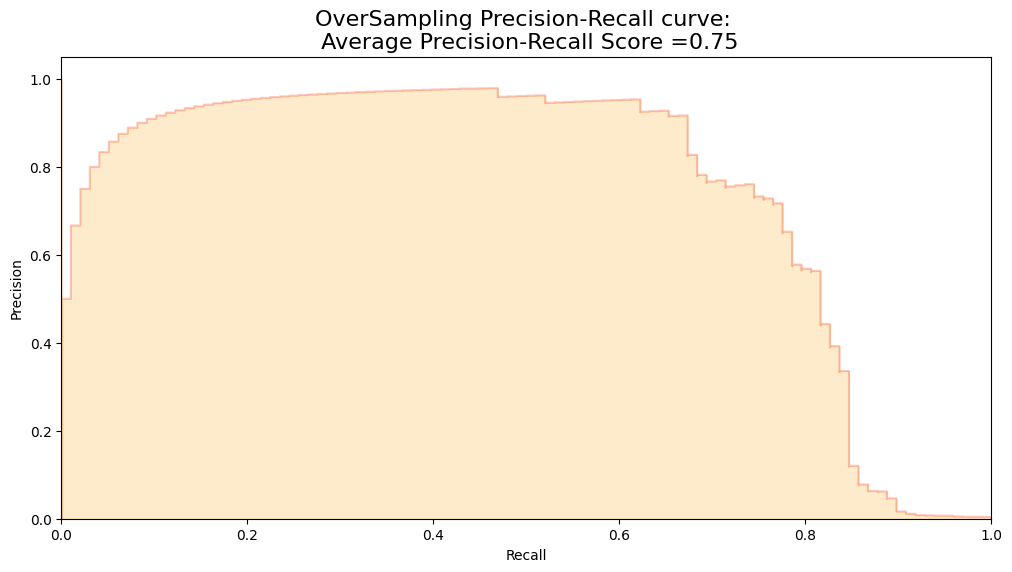

In [315]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [316]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE()
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [317]:
# We Improve the score by 2% approximately
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :8.0494384765625 sec


### Test Data with Logistic Regression:

In [318]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[102   1]
 [  9  63]]
Confusion matrix, without normalization
[[102   1]
 [ 12  60]]
Confusion matrix, without normalization
[[102   1]
 [ 13  59]]
Confusion matrix, without normalization
[[102   1]
 [ 13  59]]


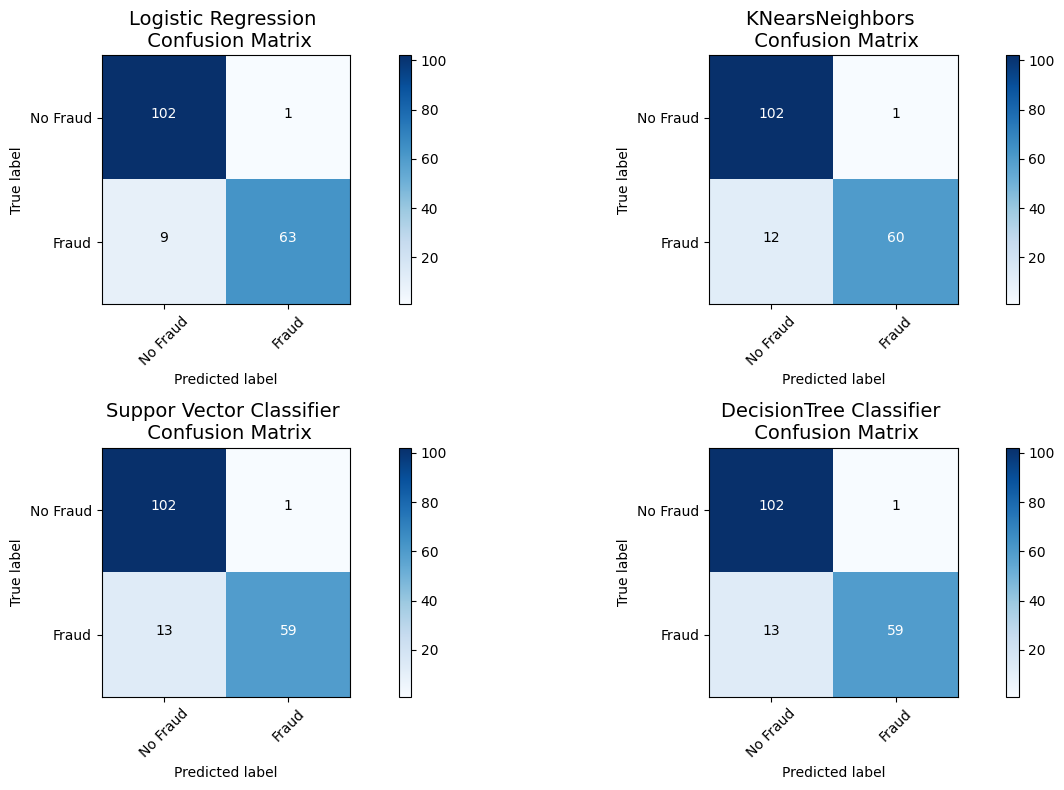

In [319]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

## sns plots

# fig, ax = plt.subplots(2, 2,figsize=(22,12))


# sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap="Blues")
# ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
# ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

# sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap="Blues")
# ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
# ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

# sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap="Blues")
# ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
# ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

# sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap="Blues")
# ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
# ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


# plt.show()

labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(log_reg_cf, labels, title="Logistic Regression \n Confusion Matrix", cmap="Blues")

fig.add_subplot(222)
plot_confusion_matrix(kneighbors_cf, labels, title="KNearsNeighbors \n Confusion Matrix", cmap="Blues")

fig.add_subplot(223)
plot_confusion_matrix(svc_cf, labels, title="Suppor Vector Classifier \n Confusion Matrix", cmap="Blues")

fig.add_subplot(224)
plot_confusion_matrix(svc_cf, labels, title="DecisionTree Classifier \n Confusion Matrix", cmap="Blues")

### Confusion Matrix:

**Positive/Negative**: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


**True Negatives (Top-Left Square)**: This is the number of correctly classifications of the "No" (No Fraud Detected) class.


**False Negatives (Top-Right Square)**: This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.


**False Positives (Bottom-Left Square)**: This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class


**True Positives (Bottom-Right Square)**: This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

In [320]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       103
           1       0.98      0.88      0.93        72

    accuracy                           0.94       175
   macro avg       0.95      0.93      0.94       175
weighted avg       0.95      0.94      0.94       175

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       103
           1       0.98      0.83      0.90        72

    accuracy                           0.93       175
   macro avg       0.94      0.91      0.92       175
weighted avg       0.93      0.93      0.92       175

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       103
           1       0.98      0.82      0.89        72

    accuracy                           0.92       175
   macro avg       0.94      0.90      0.91       175
weighted

In [321]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading!
final_df

Technique     Score
0  Random UnderSampling  0.942857
1  Oversampling (SMOTE)  0.987781

In [322]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [323]:
undersample_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 30)                930       
                                                                 
 dense_28 (Dense)            (None, 32)                992       
                                                                 
 dense_29 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1988 (7.77 KB)
Trainable params: 1988 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [324]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [325]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
23/23 - 1s - loss: 0.5801 - accuracy: 0.6179 - val_loss: 0.4430 - val_accuracy: 0.8000 - 967ms/epoch - 42ms/step
Epoch 2/20
23/23 - 0s - loss: 0.4115 - accuracy: 0.8643 - val_loss: 0.3525 - val_accuracy: 0.8857 - 83ms/epoch - 4ms/step
Epoch 3/20
23/23 - 0s - loss: 0.3276 - accuracy: 0.9071 - val_loss: 0.2879 - val_accuracy: 0.9143 - 103ms/epoch - 4ms/step
Epoch 4/20
23/23 - 0s - loss: 0.2716 - accuracy: 0.9196 - val_loss: 0.2456 - val_accuracy: 0.9214 - 109ms/epoch - 5ms/step
Epoch 5/20
23/23 - 0s - loss: 0.2290 - accuracy: 0.9268 - val_loss: 0.2205 - val_accuracy: 0.9214 - 94ms/epoch - 4ms/step
Epoch 6/20
23/23 - 0s - loss: 0.2006 - accuracy: 0.9357 - val_loss: 0.2022 - val_accuracy: 0.9357 - 91ms/epoch - 4ms/step
Epoch 7/20
23/23 - 0s - loss: 0.1805 - accuracy: 0.9375 - val_loss: 0.1799 - val_accuracy: 0.9357 - 93ms/epoch - 4ms/step
Epoch 8/20
23/23 - 0s - loss: 0.1644 - accuracy: 0.9429 - val_loss: 0.1753 - val_accuracy: 0.9357 - 91ms/epoch - 4ms/step
Epoch 9/20
23/23 - 0

In [326]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [327]:
undersample_fraud_predictions = np.argmax(undersample_predictions, axis=1)


Confusion matrix, without normalization
[[54310  2553]
 [    7    91]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


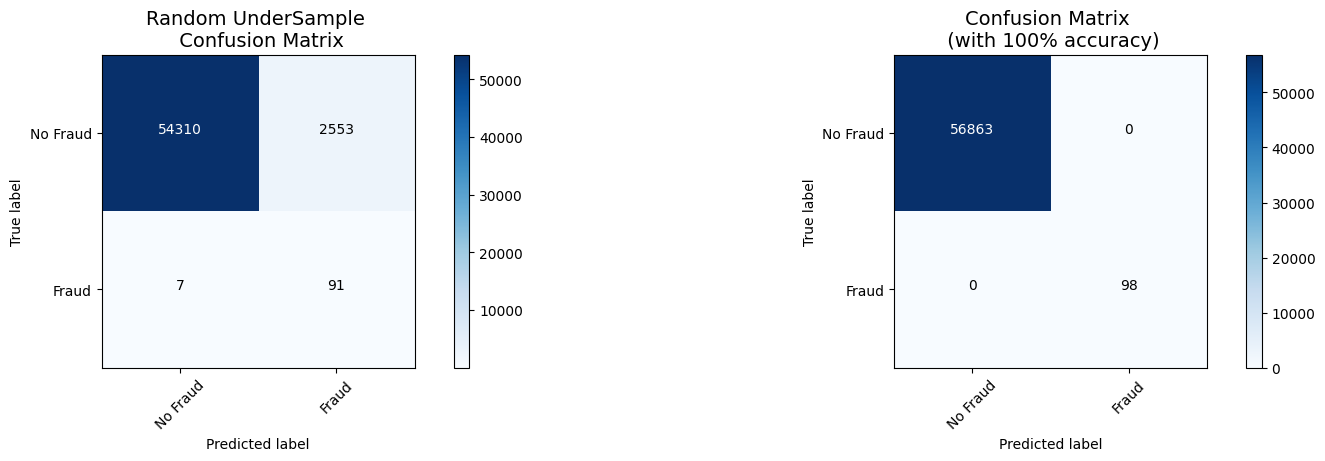

In [328]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap="Blues")

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap="Blues")


### Keras || Oversampling(SMOTE):

In [329]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [330]:
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [331]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 7s - loss: 0.0989 - accuracy: 0.9700 - val_loss: 0.0318 - val_accuracy: 0.9907 - 7s/epoch - 6ms/step
Epoch 2/20
1214/1214 - 3s - loss: 0.0188 - accuracy: 0.9954 - val_loss: 0.0119 - val_accuracy: 0.9990 - 3s/epoch - 2ms/step
Epoch 3/20
1214/1214 - 3s - loss: 0.0097 - accuracy: 0.9978 - val_loss: 0.0098 - val_accuracy: 0.9993 - 3s/epoch - 2ms/step
Epoch 4/20
1214/1214 - 3s - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0059 - val_accuracy: 0.9996 - 3s/epoch - 2ms/step
Epoch 5/20
1214/1214 - 4s - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0039 - val_accuracy: 0.9998 - 4s/epoch - 4ms/step
Epoch 6/20
1214/1214 - 3s - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9997 - 3s/epoch - 3ms/step
Epoch 7/20
1214/1214 - 3s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0014 - val_accuracy: 1.0000 - 3s/epoch - 2ms/step
Epoch 8/20
1214/1214 - 3s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 9/

In [332]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [333]:
oversample_fraud_predictions = np.argmax(oversample_predictions, axis=1)

Confusion matrix, without normalization
[[56839    24]
 [   29    69]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


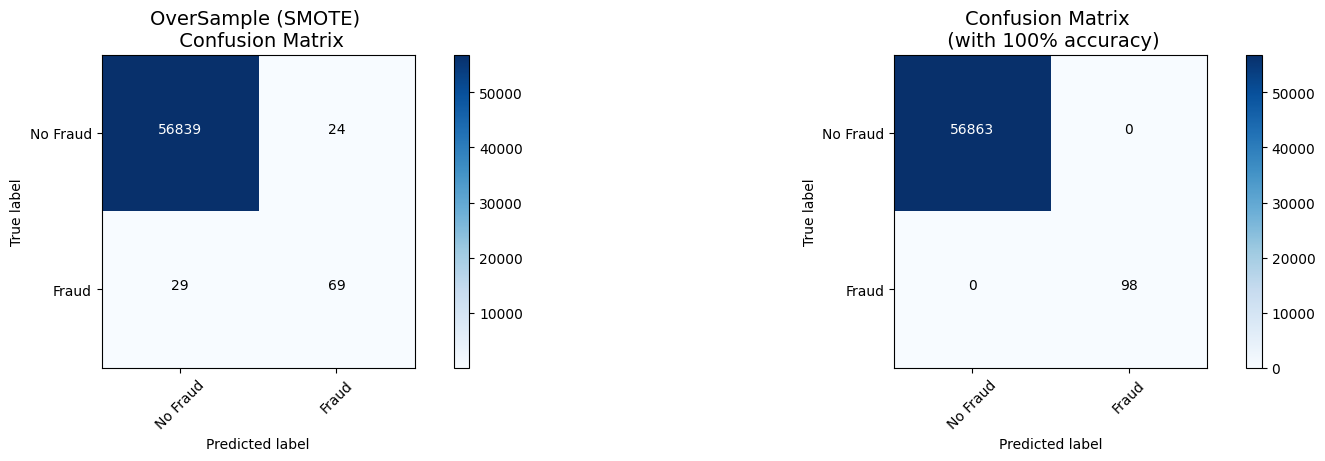

In [334]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap="Blues")

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap="Blues")

##Summary:

Implementing SMOTE to address the label imbalance in our dataset yielded some positive outcomes. However, it's worth noting that our neural network trained on the oversampled dataset sometimes predicts fewer correct fraud transactions compared to our model trained on the undersampled dataset. It's important to consider that we applied outlier removal exclusively to the random undersample dataset, not the oversampled one.


In the undersampled data, our model struggles to accurately identify many non-fraud transactions, misclassifying them as fraud cases. This could lead to inconveniences for regular customers, such as having their card blocked due to a false fraud classification, potentially causing an increase in customer complaints and dissatisfaction.


Our next step will involve applying outlier removal techniques to the oversampled dataset to assess whether it improves accuracy in the test set.


Note: Keep in mind that predictions and accuracies may change due to data shuffling in both dataframes. The primary goal is to ensure that our models can effectively distinguish between non-fraud and fraud transactions.